# Assessing Fit (polynomial regression)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
tmp = pd.Series([1., 2., 3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print (tmp)
print (tmp_cubed)
ex_sframe = pd.DataFrame()
ex_sframe['power_1'] = tmp
print (ex_sframe)

0    1.0
1    2.0
2    3.0
dtype: float64
0     1.0
1     8.0
2    27.0
dtype: float64
   power_1
0      1.0
1      2.0
2      3.0


In [6]:
def polynomial_dataframe(feature, degree):
    poly_Dframe = pd.DataFrame()
    poly_Dframe['power_1'] = feature
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_Dframe[name] = feature**power
    return poly_Dframe

In [20]:
print (polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [9]:
sales = pd.read_csv('kc_house_data.csv')

In [12]:
sales = sales.sort_values(['sqft_living','price'])

In [23]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [48]:
len(poly1_data['power_1'])

21613

In [18]:
from sklearn.linear_model import LinearRegression

In [41]:
#need to reshape because when the dataframe we create only has one column, returns a Series 
model1 = LinearRegression()
model1.fit(poly1_data['power_1'].values.reshape(-1, 1), poly1_data['price'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print (model1.intercept_, model1.coef_)

[-43580.74309447] [[ 280.6235679]]


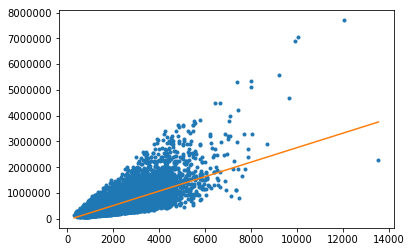

In [49]:
%matplotlib inline
plt.plot(poly1_data['power_1'].values.reshape(-1, 1),poly1_data['price'].values.reshape(-1, 1),'.',
        poly1_data['power_1'].values.reshape(-1, 1),model1.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')

In [50]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns
poly2_data['price'] = sales['price']

In [51]:
model2 = LinearRegression()
model2.fit(poly2_data[my_features], poly2_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print (model2.intercept_, model2.coef_)

199222.279305 [  6.79940947e+01   3.85812609e-02]


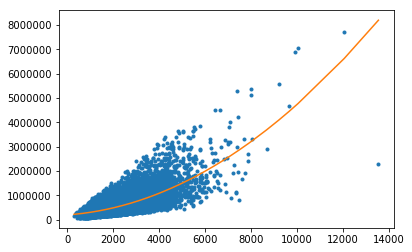

In [54]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
poly2_data['power_1'], model2.predict(poly2_data[my_features]),'-')

In [60]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

In [61]:
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000128,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808,-9223372036854775808


In [55]:
my_features = poly15_data.columns
poly15_data['price'] = sales['price']
model15 = LinearRegression()
model15.fit(poly15_data[my_features], poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
print (model15.intercept_, model15.coef_)

220910.274077 [  1.60904867e-05   4.14892428e-02   4.24803109e-06  -4.15750013e-10
  -4.77014489e-15  -3.21381241e-16  -6.65439925e-15   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


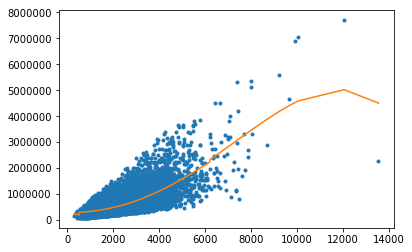

In [59]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
poly15_data['power_1'], model15.predict(poly15_data[my_features]),'-')